This notebook introduces the problem addressed in this paper:

 - localizating an object in a large image
 - foveation
 - action (saccade)
 

In [1]:
#%run 0_parameters.ipynb

In [2]:
from where import Where
from what import WhatNet
from retina import Retina
import torch.nn.functional as F

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Training the Where network

In [4]:
%ls -lh ../data/*pt

-rw-r--r-- 1 dauce dauce 6,9M mars  28 08:04 ../data/2019-03-27_train.pt
-rw-r--r-- 1 dauce dauce 6,9M mars  28 20:40 ../data/2019-03-28_train.pt
-rw-r--r-- 1 dauce dauce 7,8M avril  3 13:02 ../data/2019-04-03_train.pt
-rw-r--r-- 1 dauce dauce 7,8M avril  5 00:03 ../data/2019-04-04_train.pt
-rw-r--r-- 1 dauce dauce  12M avril  6 00:30 ../data/2019-04-05_train.pt
-rw-r--r-- 1 dauce dauce  12M avril  6 02:18 ../data/2019-04-06_train.pt
-rw-r--r-- 1 dauce dauce 1,7M juin  15 10:15 ../data/MNIST_cnn_0.1_0.1_1.0_0.5.pt
-rw-r--r-- 1 dauce dauce 1,7M juin  14 22:17 ../data/MNIST_cnn_0.1_0.1_1.0_0.7.pt
-rw-r--r-- 1 dauce dauce 1,7M juin  12 12:03 ../data/MNIST_cnn_0.5_0.5_1.0_0.7.pt
-rw-r--r-- 1 dauce dauce 1,7M avril  6 01:45 ../data/MNIST_cnn.pt
-rw-r--r-- 1 dauce dauce 1,7M juin  13 17:23 ../data/MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques_2019-06-13_10h47.pt
-rw-r--r-- 1 dauce dauce 1,7M juin  13 09:24 ../data/MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques.pt
-rw-r--r-- 1 dauce dauce 1,7M

In [5]:
from main import init
#args = init(filename='debug')
#args = init(filename='../data/2019-03-19_bis')
args = init(filename='../data/2019-06-13')
#args = init(filename='../data/2019-03-29')

args.save_model = True
period = 10
args.sf_0 = 1/period
args.B_sf = 1/period
args.contrast = 0.3
'''args.bn1_bn_momentum = 0
args.bn2_bn_momentum = 0
args.p_dropout = 0.5
args.lr = 1e-4
args.dim1 = 1000
args.dim2 = 1000
args.epochs = 60
args.verbose = True
args.save_model = True'''


'args.bn1_bn_momentum = 0\nargs.bn2_bn_momentum = 0\nargs.p_dropout = 0.5\nargs.lr = 1e-4\nargs.dim1 = 1000\nargs.dim2 = 1000\nargs.epochs = 60\nargs.verbose = True\nargs.save_model = True'

In [6]:
figname = '../paper/fig_result_contrast_{:.1f}'.format(args.contrast)
figname

'../paper/fig_result_contrast_0.3'

In [7]:
args

{'w': 28,
 'minibatch_size': 100,
 'train_batch_size': 50000,
 'test_batch_size': 10000,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 128,
 'offset_std': 15,
 'offset_max': 40,
 'noise': 1.0,
 'contrast': 0.3,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 24,
 'N_eccentricity': 10,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.5,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.0001,
 'do_adam': True,
 'bn1_bn_momentum': 0.0,
 'bn2_bn_momentum': 0.0,
 'momentum': 0.0,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-06-13',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'save_model': True}

In [8]:
if False:
    !rm ../data/2019-04-05_train.pt


In [9]:
args.epochs = 60

In [10]:
#args.train_batch_size = 20
#args.test_batch_size = 20
#retina = Retina(args)
where = Where(args) #, generate_data=False) #False, save = False)

#filename_train = args.filename + '_train.pt'
#filename_train = "../data/2019-03-14_train4.pt"
#filename_train = "../data/2019-03-29.pt"
#%ls -lh {filename_train}
#%rm {filename_train}
#%rm  ../data/debug_train.pt

#where.train(filename_train)

Train Epoch: 1/60 [0/60000 (0%)]	Loss: 2.303977
Train Epoch: 1/60 [10000/60000 (17%)]	Loss: 2.280078
Train Epoch: 1/60 [20000/60000 (33%)]	Loss: 2.193933
Train Epoch: 1/60 [30000/60000 (50%)]	Loss: 2.035318
Train Epoch: 1/60 [40000/60000 (67%)]	Loss: 1.976629
Train Epoch: 1/60 [50000/60000 (83%)]	Loss: 1.839178

Test set: Average loss: 1.7644, Accuracy: 3946/10000 (39%)

Train Epoch: 2/60 [0/60000 (0%)]	Loss: 1.800117
Train Epoch: 2/60 [10000/60000 (17%)]	Loss: 1.775403
Train Epoch: 2/60 [20000/60000 (33%)]	Loss: 1.680637
Train Epoch: 2/60 [30000/60000 (50%)]	Loss: 1.784372
Train Epoch: 2/60 [40000/60000 (67%)]	Loss: 1.529052
Train Epoch: 2/60 [50000/60000 (83%)]	Loss: 1.481796

Test set: Average loss: 1.4048, Accuracy: 5392/10000 (54%)

Train Epoch: 3/60 [0/60000 (0%)]	Loss: 1.290454
Train Epoch: 3/60 [10000/60000 (17%)]	Loss: 1.319927
Train Epoch: 3/60 [20000/60000 (33%)]	Loss: 1.290022
Train Epoch: 3/60 [30000/60000 (50%)]	Loss: 1.169423
Train Epoch: 3/60 [40000/60000 (67%)]	Loss: 1


Test set: Average loss: 0.4488, Accuracy: 8519/10000 (85%)

Train Epoch: 23/60 [0/60000 (0%)]	Loss: 0.446554
Train Epoch: 23/60 [10000/60000 (17%)]	Loss: 0.632211
Train Epoch: 23/60 [20000/60000 (33%)]	Loss: 0.399434
Train Epoch: 23/60 [30000/60000 (50%)]	Loss: 0.424765
Train Epoch: 23/60 [40000/60000 (67%)]	Loss: 0.377462
Train Epoch: 23/60 [50000/60000 (83%)]	Loss: 0.454417

Test set: Average loss: 0.4458, Accuracy: 8578/10000 (86%)

Train Epoch: 24/60 [0/60000 (0%)]	Loss: 0.465871
Train Epoch: 24/60 [10000/60000 (17%)]	Loss: 0.417909
Train Epoch: 24/60 [20000/60000 (33%)]	Loss: 0.429166
Train Epoch: 24/60 [30000/60000 (50%)]	Loss: 0.440785
Train Epoch: 24/60 [40000/60000 (67%)]	Loss: 0.391515
Train Epoch: 24/60 [50000/60000 (83%)]	Loss: 0.459582

Test set: Average loss: 0.4309, Accuracy: 8586/10000 (86%)

Train Epoch: 25/60 [0/60000 (0%)]	Loss: 0.338114
Train Epoch: 25/60 [10000/60000 (17%)]	Loss: 0.393435
Train Epoch: 25/60 [20000/60000 (33%)]	Loss: 0.360929
Train Epoch: 25/60 [30

Train Epoch: 44/60 [30000/60000 (50%)]	Loss: 0.262960
Train Epoch: 44/60 [40000/60000 (67%)]	Loss: 0.272125
Train Epoch: 44/60 [50000/60000 (83%)]	Loss: 0.369565

Test set: Average loss: 0.3386, Accuracy: 8883/10000 (89%)

Train Epoch: 45/60 [0/60000 (0%)]	Loss: 0.239080
Train Epoch: 45/60 [10000/60000 (17%)]	Loss: 0.367953
Train Epoch: 45/60 [20000/60000 (33%)]	Loss: 0.175642
Train Epoch: 45/60 [30000/60000 (50%)]	Loss: 0.240236
Train Epoch: 45/60 [40000/60000 (67%)]	Loss: 0.431139
Train Epoch: 45/60 [50000/60000 (83%)]	Loss: 0.233605

Test set: Average loss: 0.3337, Accuracy: 8922/10000 (89%)

Train Epoch: 46/60 [0/60000 (0%)]	Loss: 0.219972
Train Epoch: 46/60 [10000/60000 (17%)]	Loss: 0.224369
Train Epoch: 46/60 [20000/60000 (33%)]	Loss: 0.243429
Train Epoch: 46/60 [30000/60000 (50%)]	Loss: 0.203223
Train Epoch: 46/60 [40000/60000 (67%)]	Loss: 0.244946
Train Epoch: 46/60 [50000/60000 (83%)]	Loss: 0.287986

Test set: Average loss: 0.3403, Accuracy: 8891/10000 (89%)

Train Epoch: 47/6

205 20600
206 20700
207 20800
208 20900
209 21000
210 21100
211 21200
212 21300
213 21400
214 21500
215 21600
216 21700
217 21800
218 21900
219 22000
220 22100
221 22200
222 22300
223 22400
224 22500
225 22600
226 22700
227 22800
228 22900
229 23000
230 23100
231 23200
232 23300
233 23400
234 23500
235 23600
236 23700
237 23800
238 23900
239 24000
240 24100
241 24200
242 24300
243 24400
244 24500
245 24600
246 24700
247 24800
248 24900
249 25000
250 25100
251 25200
252 25300
253 25400
254 25500
255 25600
256 25700
257 25800
258 25900
259 26000
260 26100
261 26200
262 26300
263 26400
264 26500
265 26600
266 26700
267 26800
268 26900
269 27000
270 27100
271 27200
272 27300
273 27400
274 27500
275 27600
276 27700
277 27800
278 27900
279 28000
280 28100
281 28200
282 28300
283 28400
284 28500
285 28600
286 28700
287 28800
288 28900
289 29000
290 29100
291 29200
292 29300
293 29400
294 29500
295 29600
296 29700
297 29800
298 29900
299 30000
300 30100
301 30200
302 30300
303 30400
304 30500



Test set: Average loss: 0.4021

Train Epoch: 11/60 [0/60000 (0%)]	Loss: 0.374327
Train Epoch: 11/60 [10000/60000 (17%)]	Loss: 0.377036
Train Epoch: 11/60 [20000/60000 (33%)]	Loss: 0.382790
Train Epoch: 11/60 [30000/60000 (50%)]	Loss: 0.385017
Train Epoch: 11/60 [40000/60000 (67%)]	Loss: 0.387056
Train Epoch: 11/60 [50000/60000 (83%)]	Loss: 0.378032

Test set: Average loss: 0.4027

Train Epoch: 12/60 [0/60000 (0%)]	Loss: 0.375465
Train Epoch: 12/60 [10000/60000 (17%)]	Loss: 0.374819
Train Epoch: 12/60 [20000/60000 (33%)]	Loss: 0.371962
Train Epoch: 12/60 [30000/60000 (50%)]	Loss: 0.387294
Train Epoch: 12/60 [40000/60000 (67%)]	Loss: 0.372707
Train Epoch: 12/60 [50000/60000 (83%)]	Loss: 0.379674

Test set: Average loss: 0.4034

Train Epoch: 13/60 [0/60000 (0%)]	Loss: 0.375218
Train Epoch: 13/60 [10000/60000 (17%)]	Loss: 0.373437
Train Epoch: 13/60 [20000/60000 (33%)]	Loss: 0.368459
Train Epoch: 13/60 [30000/60000 (50%)]	Loss: 0.382773
Train Epoch: 13/60 [40000/60000 (67%)]	Loss: 0.37790

Train Epoch: 34/60 [20000/60000 (33%)]	Loss: 0.372475
Train Epoch: 34/60 [30000/60000 (50%)]	Loss: 0.371430
Train Epoch: 34/60 [40000/60000 (67%)]	Loss: 0.369829
Train Epoch: 34/60 [50000/60000 (83%)]	Loss: 0.369611

Test set: Average loss: 0.4033

Train Epoch: 35/60 [0/60000 (0%)]	Loss: 0.372560
Train Epoch: 35/60 [10000/60000 (17%)]	Loss: 0.370218
Train Epoch: 35/60 [20000/60000 (33%)]	Loss: 0.372374
Train Epoch: 35/60 [30000/60000 (50%)]	Loss: 0.366855
Train Epoch: 35/60 [40000/60000 (67%)]	Loss: 0.372974
Train Epoch: 35/60 [50000/60000 (83%)]	Loss: 0.372343

Test set: Average loss: 0.4034

Train Epoch: 36/60 [0/60000 (0%)]	Loss: 0.375368
Train Epoch: 36/60 [10000/60000 (17%)]	Loss: 0.374209
Train Epoch: 36/60 [20000/60000 (33%)]	Loss: 0.367568
Train Epoch: 36/60 [30000/60000 (50%)]	Loss: 0.368182
Train Epoch: 36/60 [40000/60000 (67%)]	Loss: 0.367059
Train Epoch: 36/60 [50000/60000 (83%)]	Loss: 0.374424

Test set: Average loss: 0.4036

Train Epoch: 37/60 [0/60000 (0%)]	Loss: 0.37043

Train Epoch: 57/60 [40000/60000 (67%)]	Loss: 0.368465
Train Epoch: 57/60 [50000/60000 (83%)]	Loss: 0.368529

Test set: Average loss: 0.4027

Train Epoch: 58/60 [0/60000 (0%)]	Loss: 0.372647
Train Epoch: 58/60 [10000/60000 (17%)]	Loss: 0.368583
Train Epoch: 58/60 [20000/60000 (33%)]	Loss: 0.374231
Train Epoch: 58/60 [30000/60000 (50%)]	Loss: 0.365781
Train Epoch: 58/60 [40000/60000 (67%)]	Loss: 0.367881
Train Epoch: 58/60 [50000/60000 (83%)]	Loss: 0.371378

Test set: Average loss: 0.4028

Train Epoch: 59/60 [0/60000 (0%)]	Loss: 0.368567
Train Epoch: 59/60 [10000/60000 (17%)]	Loss: 0.373033
Train Epoch: 59/60 [20000/60000 (33%)]	Loss: 0.368269
Train Epoch: 59/60 [30000/60000 (50%)]	Loss: 0.365042
Train Epoch: 59/60 [40000/60000 (67%)]	Loss: 0.365350
Train Epoch: 59/60 [50000/60000 (83%)]	Loss: 0.362065

Test set: Average loss: 0.4024

Train Epoch: 60/60 [0/60000 (0%)]	Loss: 0.364312
Train Epoch: 60/60 [10000/60000 (17%)]	Loss: 0.364950
Train Epoch: 60/60 [20000/60000 (33%)]	Loss: 0.36676

In [11]:
where.model

WhereNet(
  (bn1): Linear(in_features=2880, out_features=1000, bias=True)
  (bn1_bn): BatchNorm1d(1000, eps=1e-05, momentum=1.0, affine=True, track_running_stats=True)
  (bn2): Linear(in_features=1000, out_features=1000, bias=True)
  (bn2_bn): BatchNorm1d(1000, eps=1e-05, momentum=1.0, affine=True, track_running_stats=True)
  (bn3): Linear(in_features=1000, out_features=240, bias=True)
)

In [12]:
retina_data, accuracy_colliculus = next(iter(where.loader_train))

In [13]:
from where import Normalize
retina_data = Normalize()(retina_data.float())


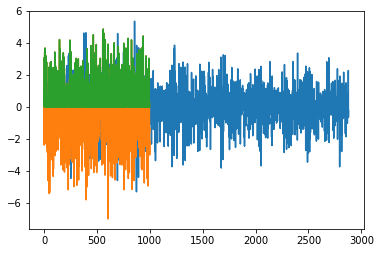

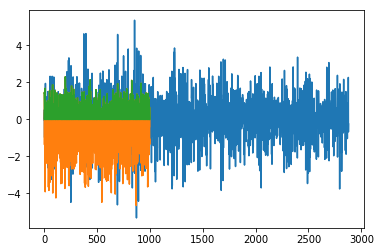

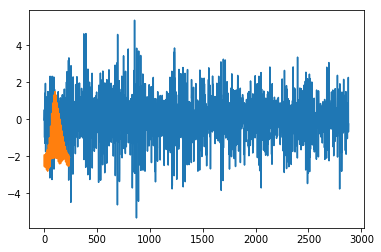

In [14]:
i = 1
data_i = retina_data[i,:].float()
plt.plot(data_i.detach().numpy())
x = where.model.bn1(data_i)
plt.plot(x.detach().numpy())
x = F.relu(x)
plt.plot(x.detach().numpy())
plt.show()
x2 = where.model.bn2(x)
plt.plot(data_i.detach().numpy())
plt.plot(x2.detach().numpy())
x2 = F.relu(x2)
plt.plot(x2.detach().numpy())
plt.show()
x3 = where.model.bn3(x2)
plt.plot(data_i.detach().numpy())
plt.plot(x3.detach().numpy())
#plt.plot(where.model.bn1(retina_data.float())[i,:].detach().numpy())

In [15]:
import torch

output = torch.sigmoid(where.model(retina_data))
output_test = where.pred_accuracy(retina_data)

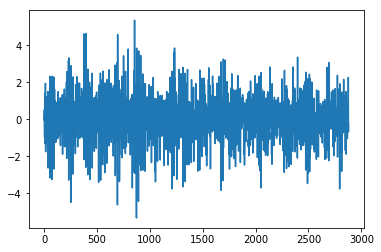

In [16]:
plt.plot(retina_data[i,:].detach().numpy())

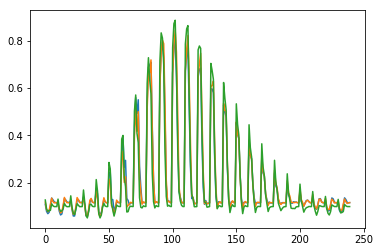

In [17]:
plt.plot(output[i, :].detach().numpy())
plt.plot(output_test[i, :])
plt.plot(accuracy_colliculus[i, :].detach().numpy())

In [18]:
retina_data_test, retina_fullfield_test, accuracy_colliculus_test, accuracy_colliculus_fullfield_test, labels_test, i_shift, j_shift = next(iter(where.loader_test))
#(retina_data_test, retina_fullfield_test), (accuracy_colliculus_test, accuracy_colliculus_fullfield_test, labels_test, i_shift, j_shift) = next(iter(where.loader_test))

In [19]:
from what import WhatTrainer
data, label = next(iter(WhatTrainer(args).test_loader))

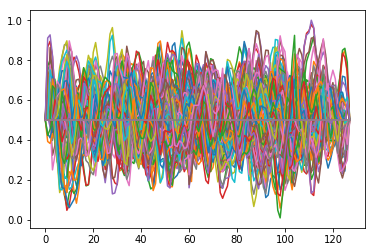

In [20]:
_ = plt.plot(retina_fullfield_test[i,:].detach().numpy())

In [21]:
#plt.plot(data[i,:].detach().numpy())

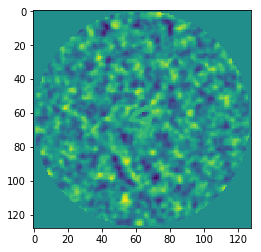

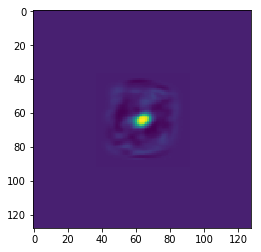

In [22]:
plt.imshow(retina_fullfield_test[i,:])
plt.show()
plt.imshow(accuracy_colliculus_fullfield_test[i,:])


In [23]:
output = torch.sigmoid(where.model(retina_data_test.float()))

Text(0.5, 1.05, 'True')

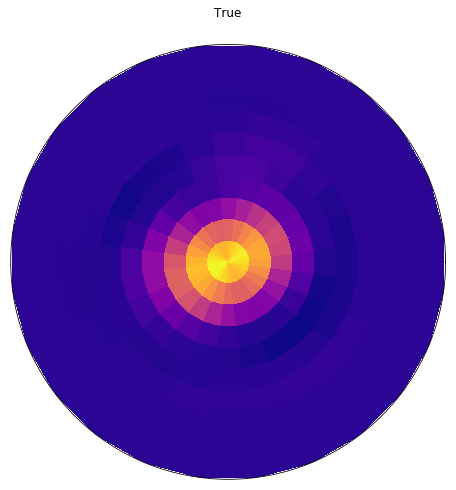

In [24]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, accuracy_colliculus_test[i, :].detach().numpy().reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title("True")

Text(0.5, 1.05, 'predicted')

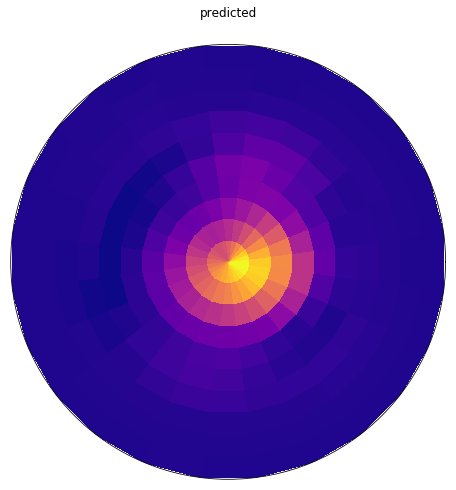

In [25]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, output[i, :].detach().numpy().reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title("predicted")

# Visualisation of some examples

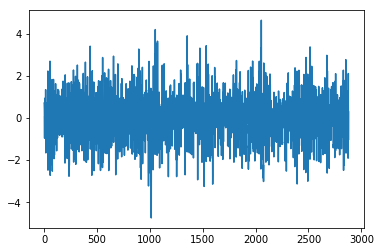

In [26]:
i = 3
plt.plot(retina_data[i,:].detach().numpy())

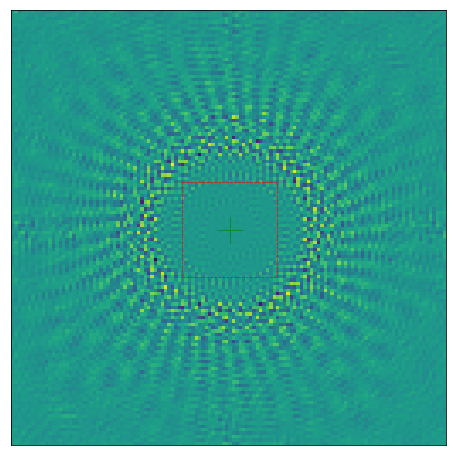

In [27]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax = where.retina.show(ax, where.retina.retina_invert(retina_data[i,:].detach().numpy()))


Text(0.5, 1.05, 'True')

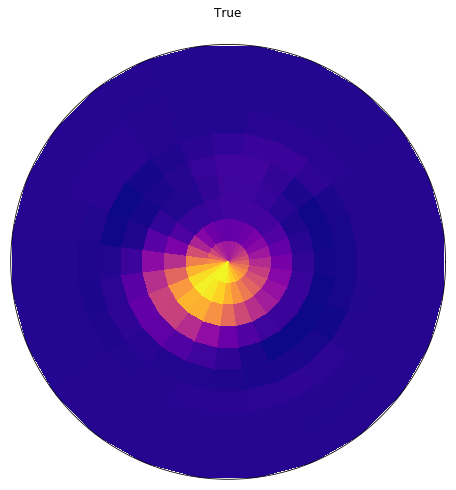

In [28]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, accuracy_colliculus[i, :].numpy().reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title("True")

In [29]:
retina_data

tensor([[ 0.2723,  0.2744,  0.2597,  ..., -1.0765,  0.1762,  0.4381],
        [-0.0306,  0.1418,  0.5224,  ...,  2.2688, -0.6743, -0.2484],
        [-0.0722, -0.0330, -0.0429,  ..., -2.0442, -0.1954, -0.3528],
        ...,
        [-0.4982,  0.2681,  0.2097,  ...,  0.7320,  0.1034, -2.0225],
        [-0.5479,  0.2736,  0.3873,  ..., -2.7093, -0.8933,  1.1652],
        [ 0.0836, -0.2309, -0.1356,  ...,  0.2570,  0.2348, -2.2019]])

In [30]:
min(accuracy_colliculus[3,:])

tensor(0.0676)

In [31]:
print(accuracy_colliculus.shape)
print(args.N_azimuth)
print(args.N_eccentricity) 

print(where.args.N_azimuth)
print(where.args.N_eccentricity) 

torch.Size([100, 240])
24
10
24
10


## knowing the target position

In [32]:
idx_start, idx_stop = 0, 20
retina_data, data_fullfield, accuracy_colliculus, _, label, i_offset, j_offset = next(iter(where.loader_test))
data_fullfield 

tensor([[[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.

1.1867205

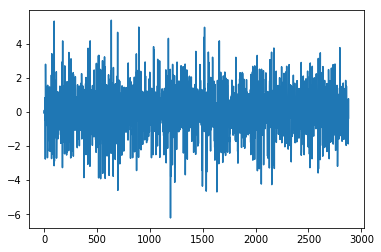

In [33]:
plt.plot(retina_data[i,:].detach().numpy())
np.std(retina_data[i,:].detach().numpy())

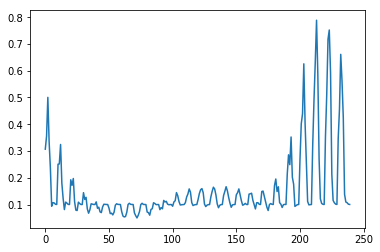

In [34]:
plt.plot(accuracy_colliculus[i,:].detach().numpy())

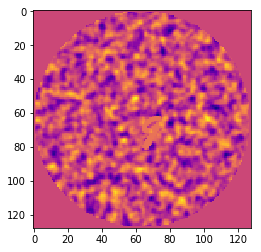

In [35]:
plt.imshow(data_fullfield[2,:])

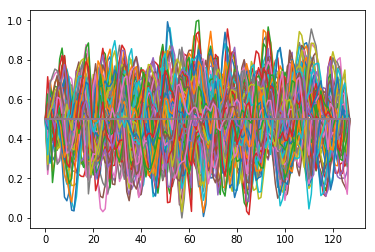

In [36]:
_ = plt.plot(data_fullfield[2,:].detach().numpy())
#data_fullfield *= 255

In [37]:
import numpy as np
Delta=0

#im = np.zeros((args.test_batch_size, args.w, args.w))
im = np.zeros((idx_stop, where.args.w, where.args.w))
for idx in range(idx_stop): #args.test_batch_size):
    #im[idx, :, :] = where.extract(data_fullfield[idx, :, :], positions[idx]['i_offset'], positions[idx]['j_offset'])
    im[idx, :, :] = where.extract(data_fullfield[idx+Delta, :, :], i_offset[idx+Delta], j_offset[idx+Delta])
proba = where.classify_what(im).detach().numpy()
pred = proba.argmax(axis=1)# get the index of the max log-probability
#acc = proba[:, pred]

print(pred)
label_n = label[idx_start+Delta:idx_stop+Delta].detach().numpy()
print(label_n)
print(np.mean(np.equal(pred, label_n)))

#.detach().numpy().mean() #(pred==label.numpy()).mean()
#print('Accuracy max (knowing the position)=', acc_max)

[5 0 9 2 6 5 0 7 1 8 6 3 1 3 4 1 7 2 9 5]
[5 0 9 2 6 5 0 7 1 8 6 3 1 3 4 1 7 2 9 5]
1.0


## Generate a noisy MNIST database

In [38]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
import os

#im = np.zeros((args.test_batch_size, args.w, args.w))

from display import get_data_loader
filename_dataset = '../data/noisy-MNIST.pt'

if not os.path.isfile(filename_dataset):
    batch_size = 100
    loader_full = get_data_loader(batch_size=batch_size, train=True, mean=where.args.mean, std=where.args.std, seed=where.args.seed+1)
    im = np.zeros((where.args.train_batch_size, 1, where.args.w, where.args.w))
    im_label = np.zeros(where.args.train_batch_size, dtype = 'int')
    for idx, (data, label) in enumerate (loader_full):
        if idx % 10 == 0:
            print(idx * 100)
        if idx == 500:
            break
        for j in range(batch_size):
            data_fullfield_, i_offset, j_offset = where.display.draw(data[j, 0, :, :].numpy())
            extracted = where.extract(data_fullfield_, i_offset, j_offset)
            im[idx * batch_size + j, 0, :, :] = extracted.reshape(1, 28, 28)
            im_label[idx * batch_size + j] = label[j]
    im = Variable(torch.FloatTensor(im)).to(where.device)
    im_label = Variable(torch.LongTensor(im_label)).to(where.device)
    loader_train = DataLoader(TensorDataset(im, im_label), batch_size=100)
    torch.save(loader_train, filename_dataset)
#.detach().numpy().mean() #(pred==label.numpy()).mean()
#print('Accuracy max (knowing the position)=', acc_max)

In [39]:
if False:
    check_loader = torch.load(filename_dataset)
    im, label = next(iter(check_loader))
    im.shape
    i = 4
    plt.imshow(im[i,0,:,:])
    plt.title(label[i].detach().numpy())

tensor(5) tensor(6) tensor(0)


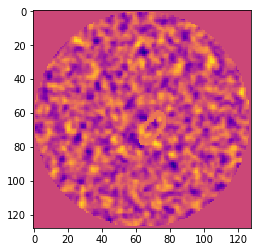

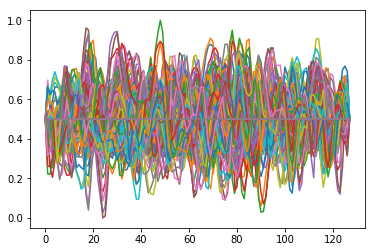

In [40]:
idx = 1
plt.imshow(data_fullfield[idx,:,:])
print(i_offset[idx], j_offset[idx], label[idx])
plt.show()
#f = plt.plot(Normalize()(data_fullfield[idx,:,:]).detach().numpy())
f = plt.plot(data_fullfield[idx,:,:].detach().numpy())

In [41]:
idx_start, idx_stop = 0, 20

#from main_orig import init
#args = init()
#args.N_azimuth * args.N_eccentricity

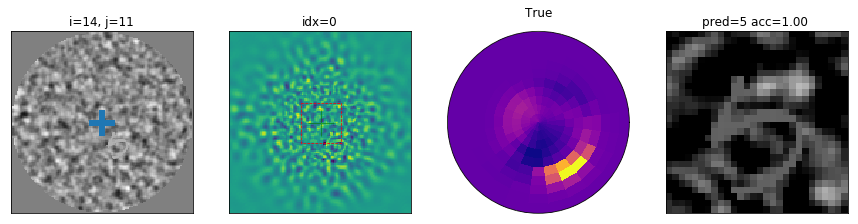

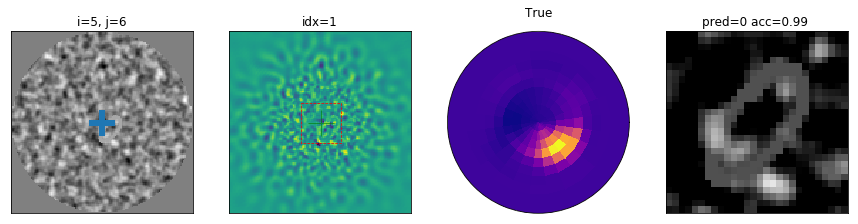

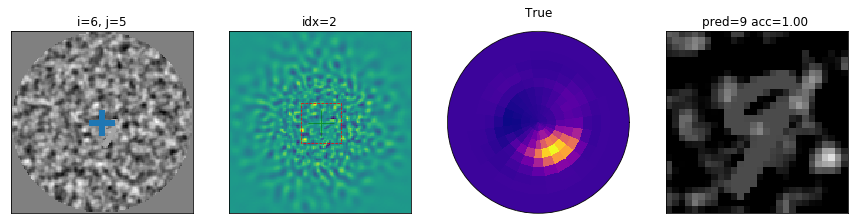

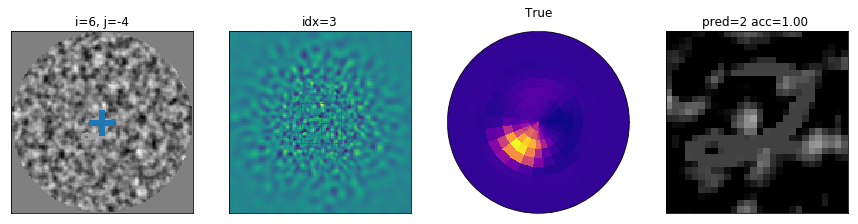

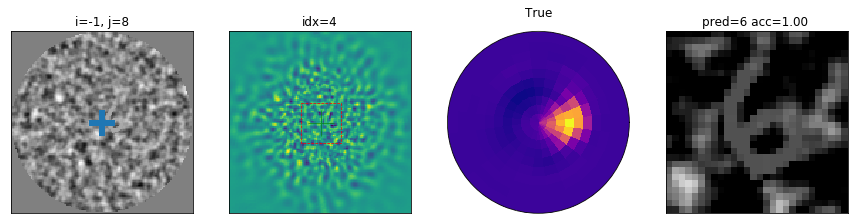

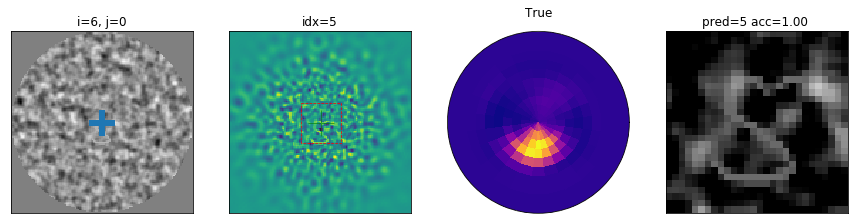

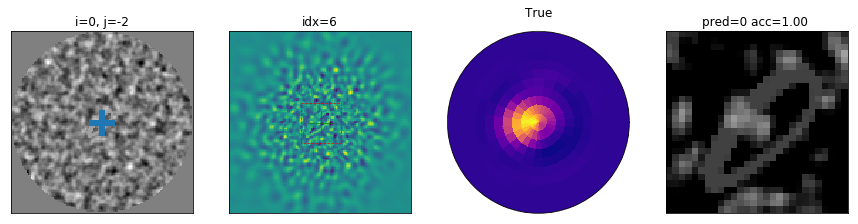

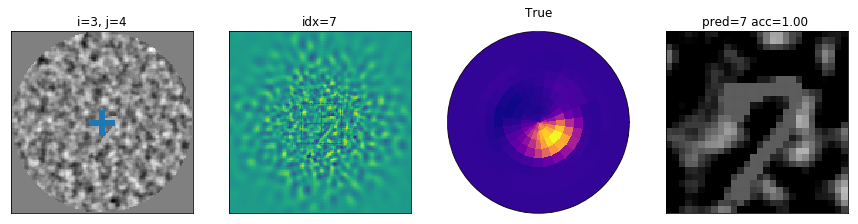

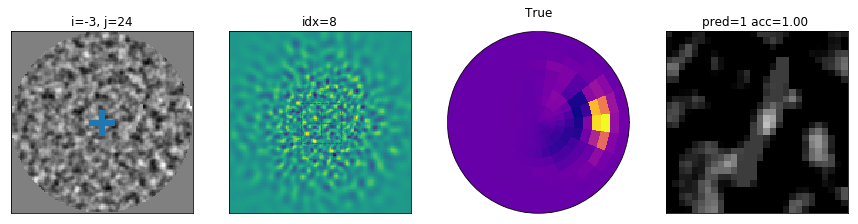

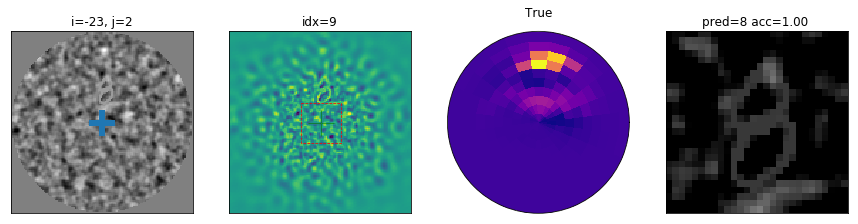

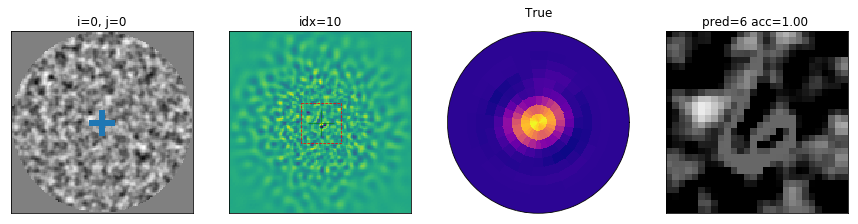

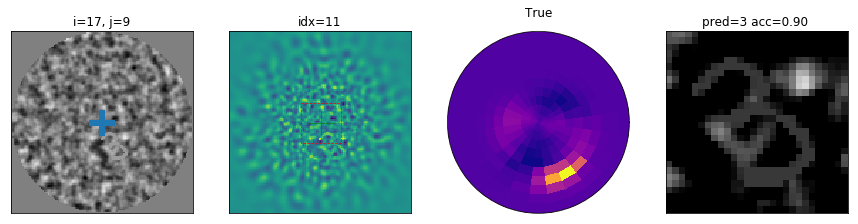

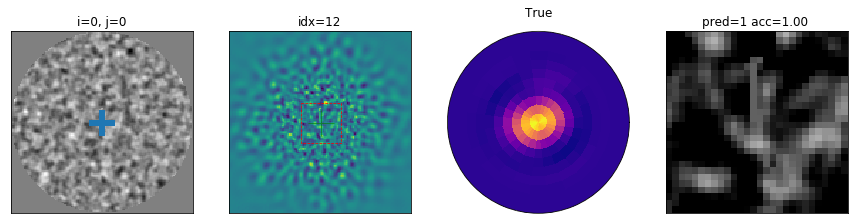

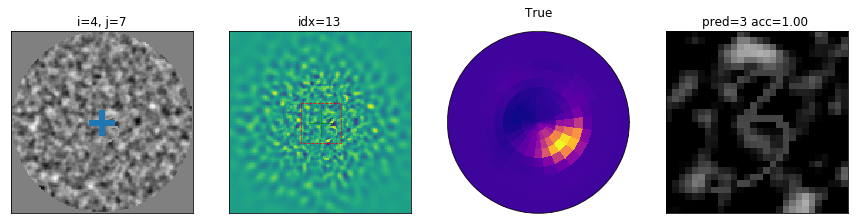

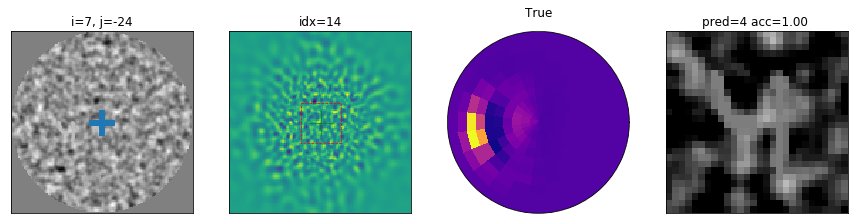

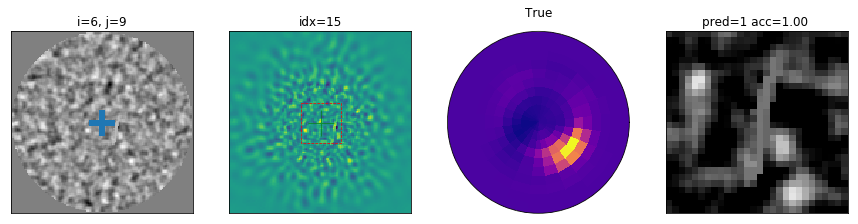

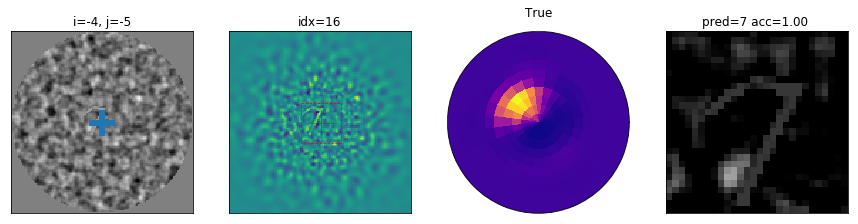

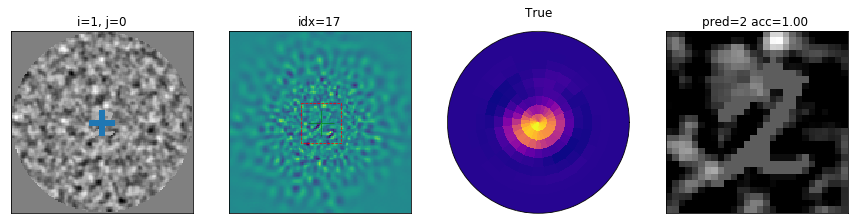

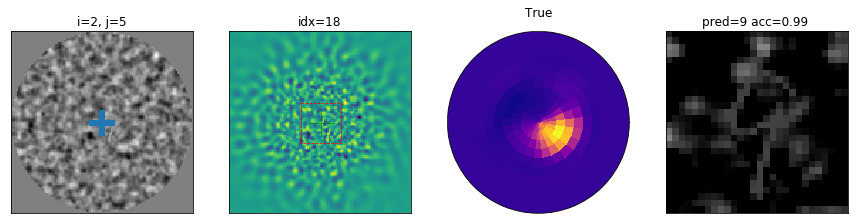

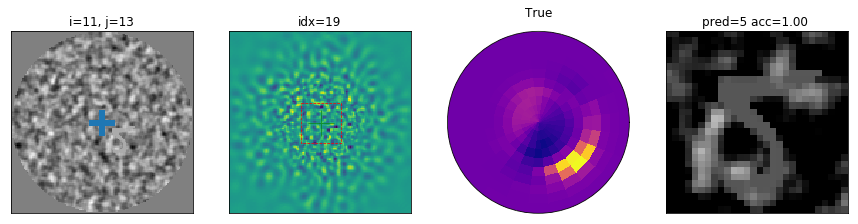

In [42]:
for idx in range(idx_start, idx_stop):
    fig = plt.figure(figsize = (15, 8))
    
    ax = fig.add_subplot(141)
    ax = where.display.show(ax, data_fullfield[idx, :, :])
    #ax.set_title(f"i={positions[idx]['i_offset']}, j={positions[idx]['j_offset']}")
    ax.set_title(f"i={i_offset[idx]}, j={j_offset[idx]}")
    
    ax = fig.add_subplot(142)
    data_retina = where.retina.retina(data_fullfield[idx, :, :])
    ax = where.retina.show(ax, where.retina.retina_invert(data_retina))
    ax.set_title(f"idx={idx}")
              
    ax = fig.add_subplot(143, projection='polar')
    ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, accuracy_colliculus[idx, :].numpy().reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title("True")

    ax = fig.add_subplot(144)
    ax = where.display.show(ax, im[idx, :, :], do_cross=False)
    result = '' if pred[idx]==label[idx].numpy() else 'FALSE'
    ax.set_title(f"pred={pred[idx]} acc={proba[idx,pred[idx]]:.2f} {result}")
                 

## predicting the position of the target

In [43]:
pred_accuracy_colliculus = where.pred_accuracy(retina_data)
print('pred_accuracy_colliculus.shape=', pred_accuracy_colliculus.shape)

pred_accuracy_colliculus.shape= (100, 240)


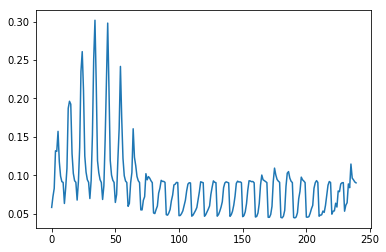

In [44]:
plt.plot(pred_accuracy_colliculus[2,:])

In [45]:
im_colliculus = where.retina.accuracy_invert(pred_accuracy_colliculus[0,:])
im_colliculus.shape

(128, 128)

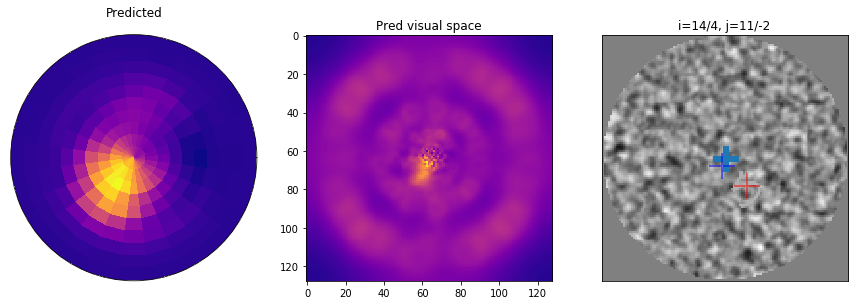

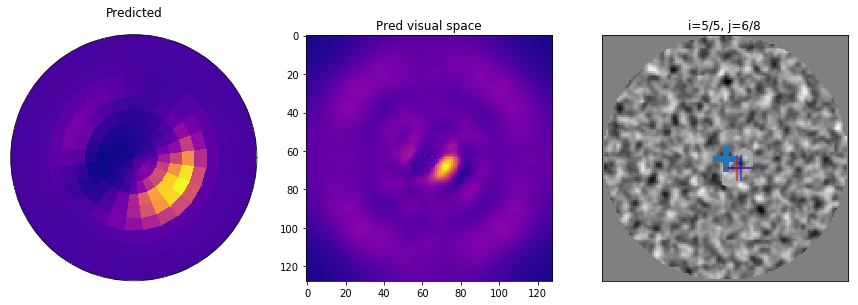

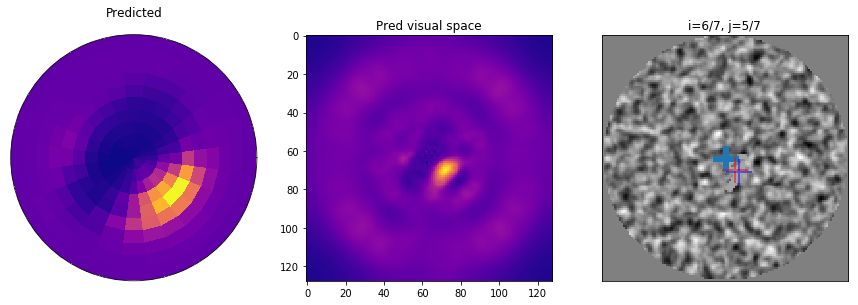

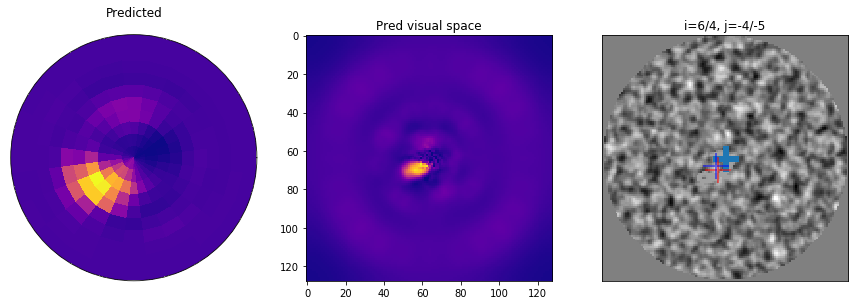

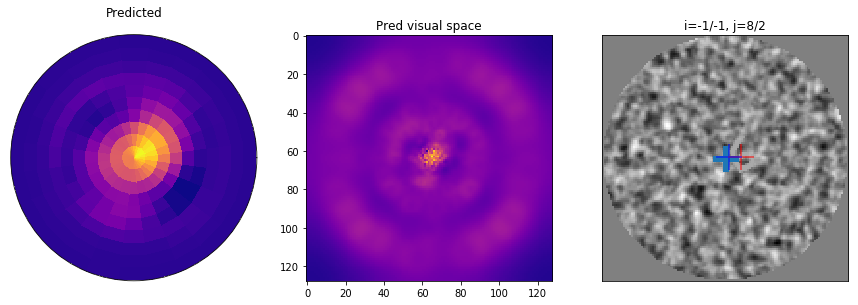

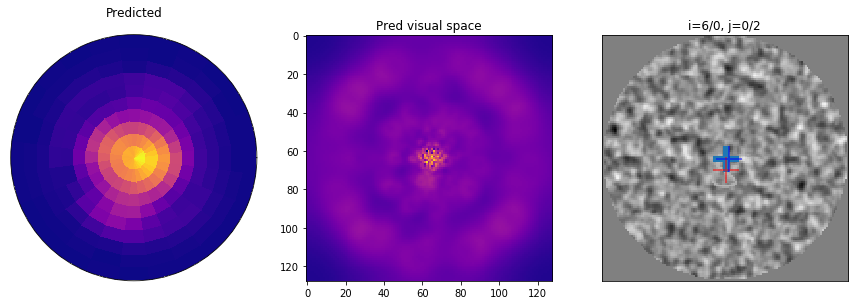

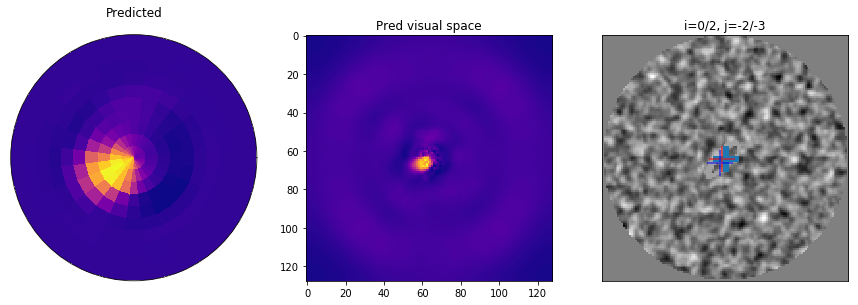

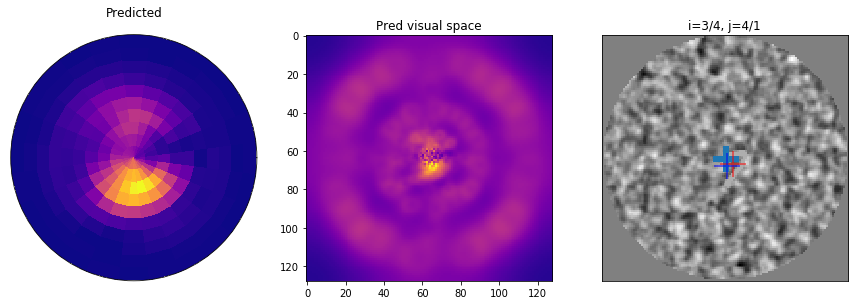

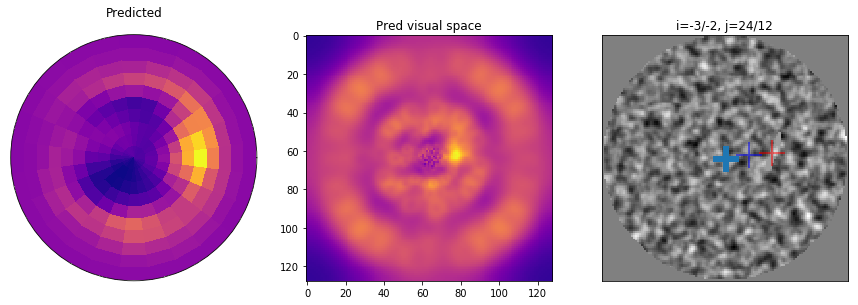

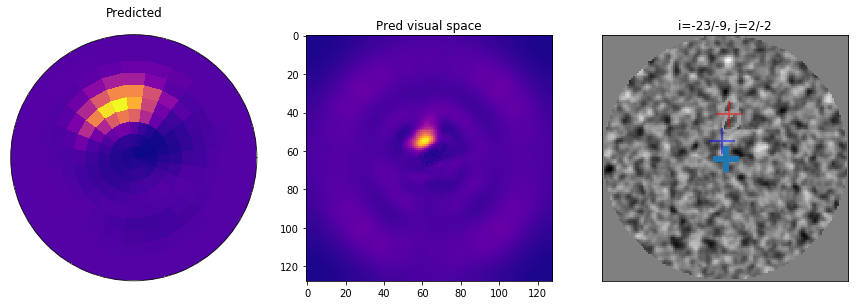

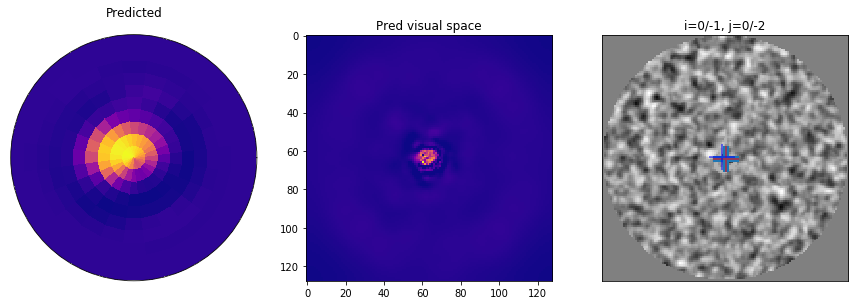

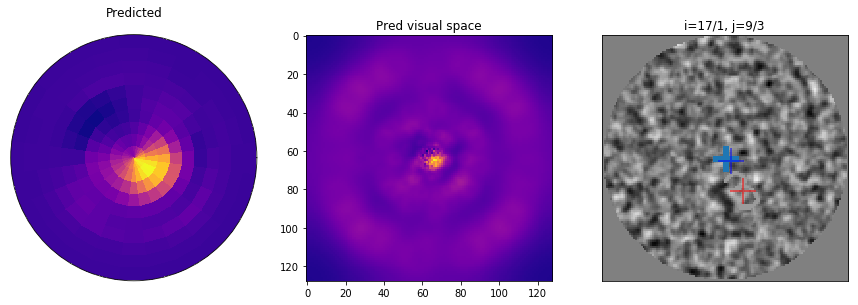

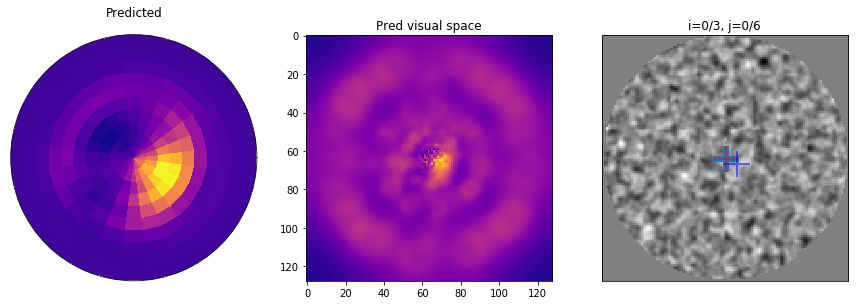

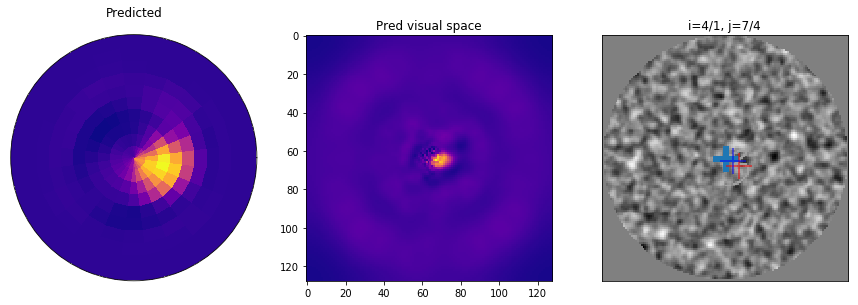

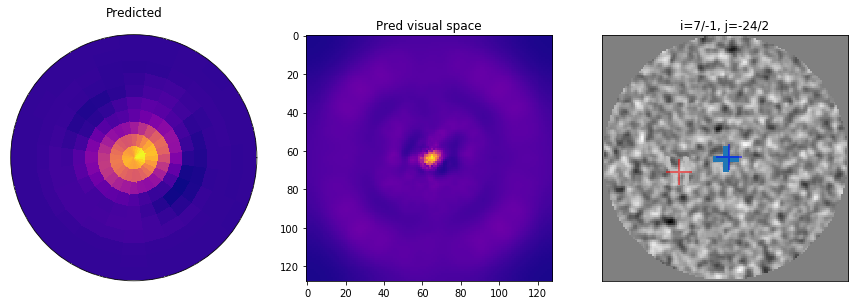

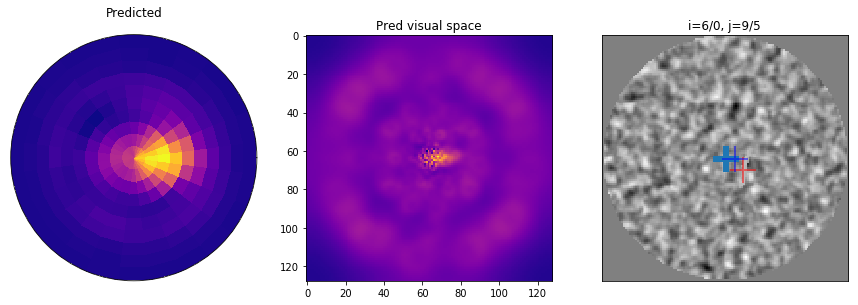

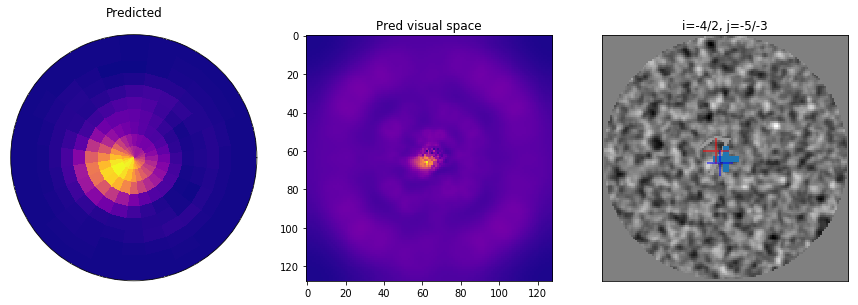

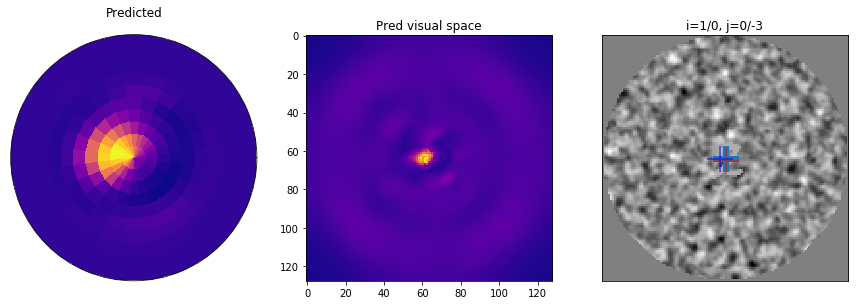

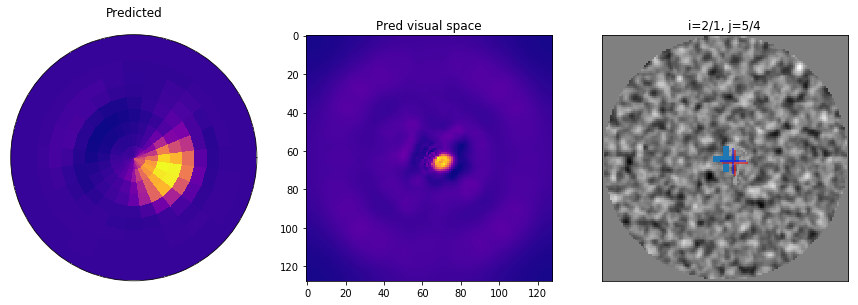

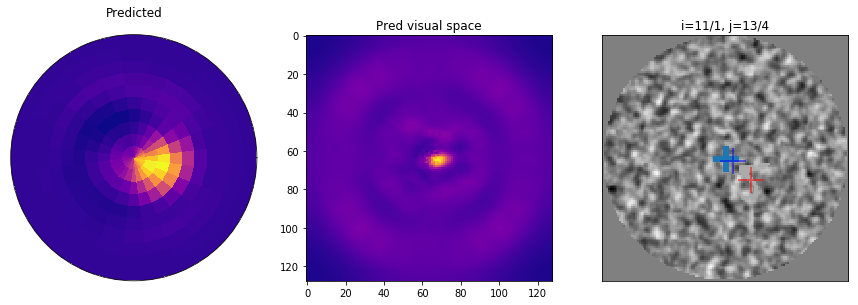

In [46]:
for idx in range(idx_start, idx_stop):
    fig = plt.figure(figsize = (15, 8))

    ax = fig.add_subplot(131, projection='polar')
    ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, pred_accuracy_colliculus[idx, :].reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_title("Predicted")
    ax.set_yticklabels([])
    ax.set_xticklabels([])
              
    x = where.retina.accuracy_invert(pred_accuracy_colliculus[idx, :])
    ax = fig.add_subplot(132)
    ax.imshow(x, vmin=0, cmap=plt.plasma())
    ax.set_title("Pred visual space")
    
    i_pred, j_pred = where.index_prediction(pred_accuracy_colliculus[idx, :], do_shortcut=True)
    
    ax = fig.add_subplot(133)
    ax = where.display.show(ax, data_fullfield[idx, :, :])
    #ax.set_title(f"i={positions[idx]['i_offset']}/{i_pred}, j={positions[idx]['j_offset']}/{j_pred}")
    ax.set_title(f"i={i_offset[idx]}/{i_pred}, j={j_offset[idx]}/{j_pred}")
    #ax.plot([positions[idx]['j_offset']+args.N_pic//2], [positions[idx]['i_offset']+args.N_pic//2], '+', c='r', ms=26, markeredgewidth=2, alpha=.5)
    ax.plot([j_offset[idx]+args.N_pic//2], [i_offset[idx]+args.N_pic//2], '+', c='r', ms=26, markeredgewidth=2, alpha=.5)
    ax.plot([j_pred+args.N_pic//2], [i_pred+args.N_pic//2], '+', c='b', ms=26, markeredgewidth=2, alpha=.5)
    
    

## doing a saccade at the predicted the position of the target

In [47]:
print(data_fullfield.shape, retina_data.shape, label.shape)

torch.Size([100, 128, 128]) torch.Size([100, 2880]) torch.Size([100])


In [48]:
accuracy = where.test_what(data_fullfield, pred_accuracy_colliculus, label)
#print('mean accuracy =', accuracy.mean())
accuracy

array([1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.])

In [49]:
label

tensor([5, 0, 9, 2, 6, 5, 0, 7, 1, 8, 6, 3, 1, 3, 4, 1, 7, 2, 9, 5, 6, 5, 2, 5,
        6, 7, 7, 8, 7, 0, 5, 4, 0, 5, 0, 3, 6, 8, 4, 5, 3, 1, 0, 4, 3, 5, 9, 6,
        9, 2, 7, 4, 8, 6, 1, 9, 5, 8, 7, 2, 4, 0, 5, 6, 3, 8, 3, 7, 5, 7, 6, 2,
        5, 2, 1, 1, 9, 6, 3, 1, 0, 1, 1, 0, 0, 4, 1, 5, 3, 7, 4, 6, 7, 4, 6, 4,
        0, 9, 8, 8])

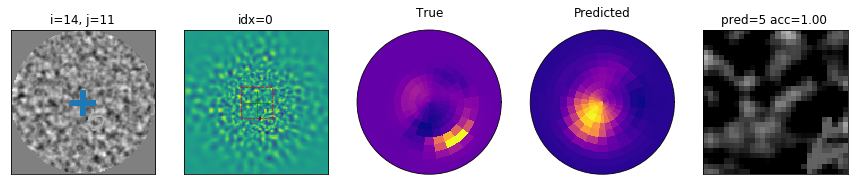

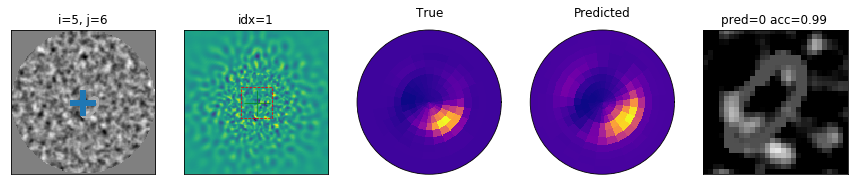

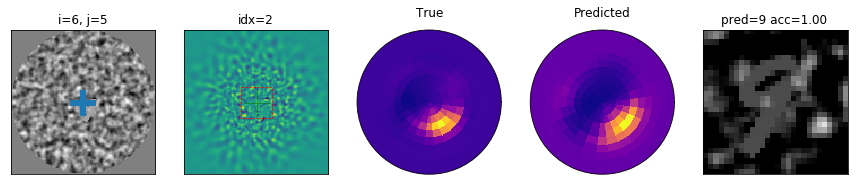

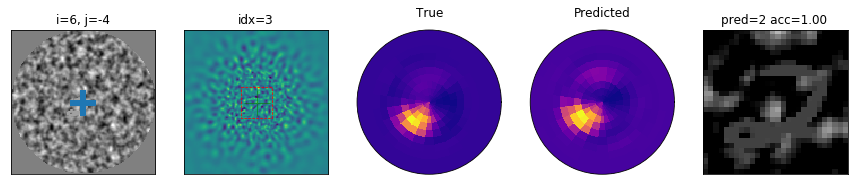

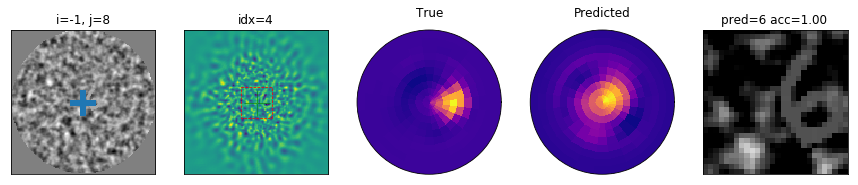

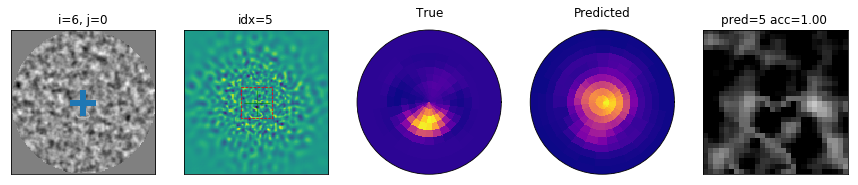

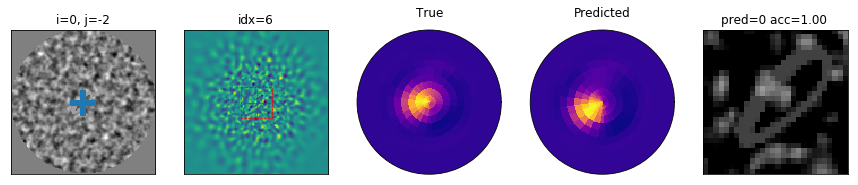

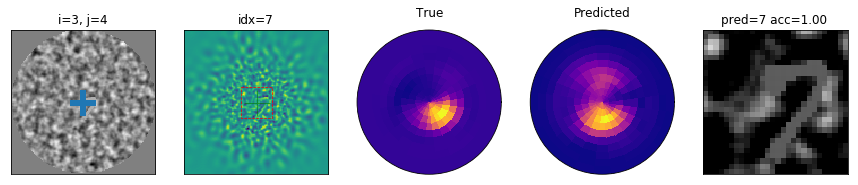

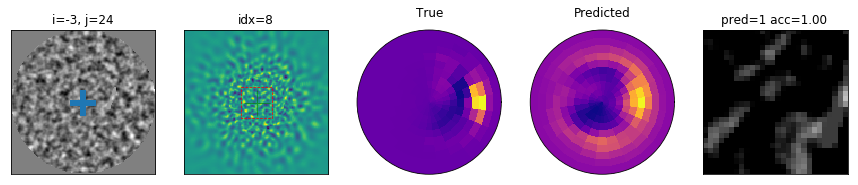

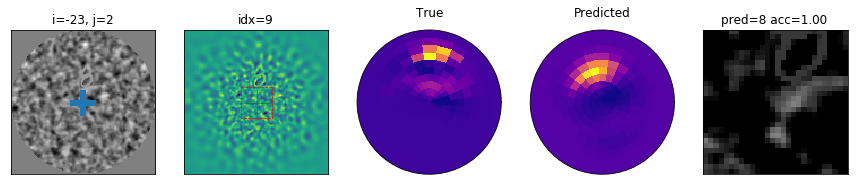

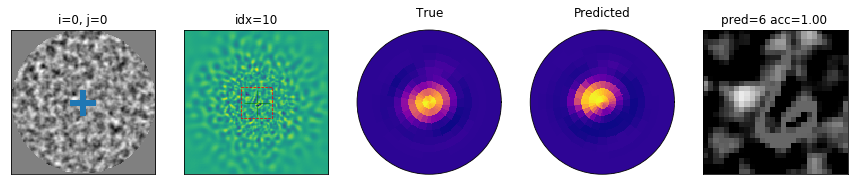

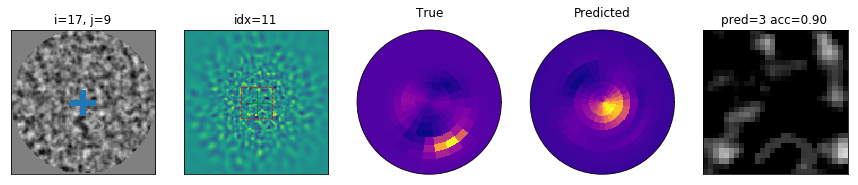

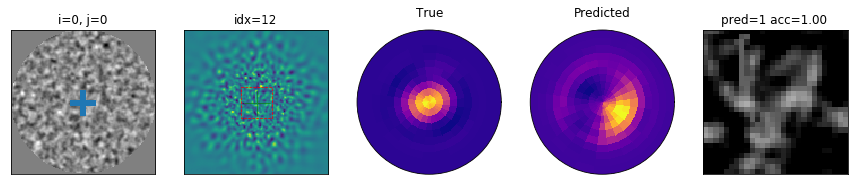

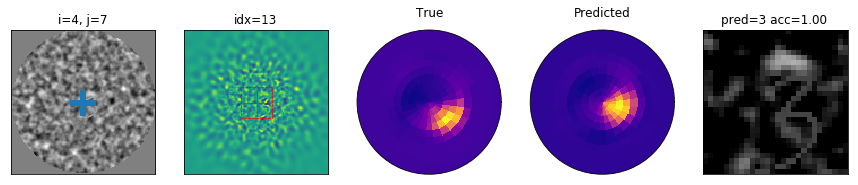

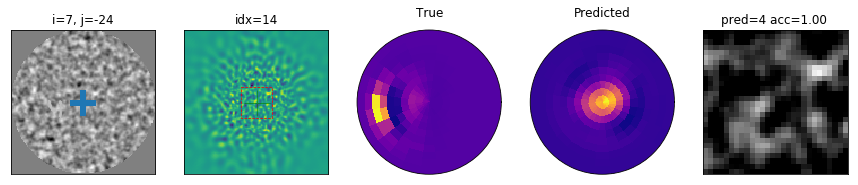

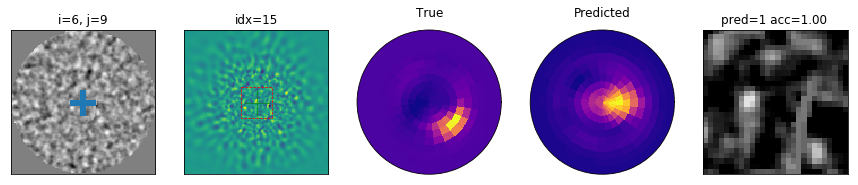

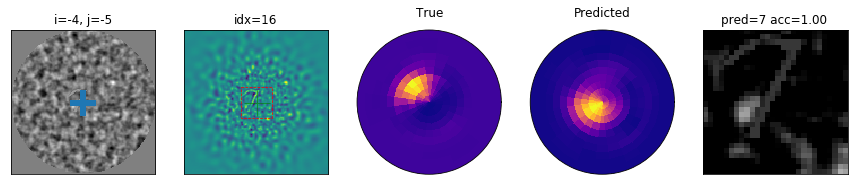

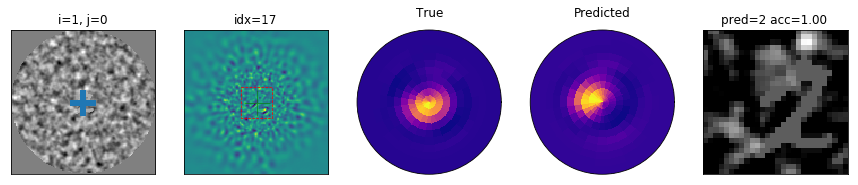

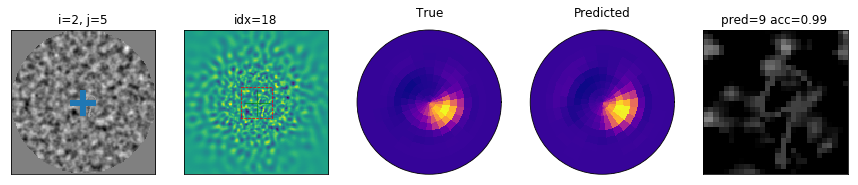

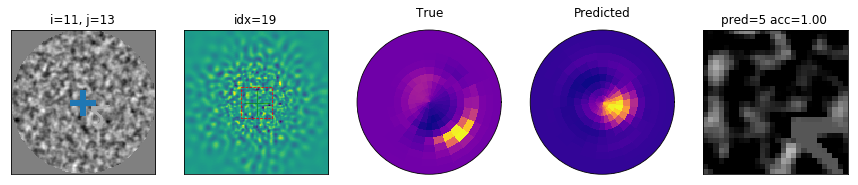

In [50]:
for idx in range(idx_start, idx_stop):
    fig = plt.figure(figsize = (15, 8))
    
    ax = fig.add_subplot(151)
    ax = where.display.show(ax, data_fullfield[idx, :, :])
    #ax.set_title(f"i={positions[idx]['i_offset']}, j={positions[idx]['j_offset']}")
    ax.set_title(f"i={i_offset[idx]}, j={j_offset[idx]}")
    
    ax = fig.add_subplot(152)
    data_retina = where.retina.retina(data_fullfield[idx, :, :])
    ax = where.retina.show(ax, where.retina.retina_invert(data_retina))
    ax.set_title(f"idx={idx}")
              
    ax = fig.add_subplot(153, projection='polar')
    ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, accuracy_colliculus[idx, :].numpy().reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title("True")

    ax = fig.add_subplot(154, projection='polar')
    ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, pred_accuracy_colliculus[idx, :].reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title("Predicted")

    i_pred, j_pred = where.index_prediction(pred_accuracy_colliculus[idx, :])
    ax = fig.add_subplot(155)                 
    ax = where.display.show(ax, where.extract(data_fullfield[idx, :, :], i_pred, j_pred), do_cross=False)
    result = '' if pred[idx]==label[idx].numpy() else 'FALSE'
    ax.set_title(f"pred={pred[idx]} acc={proba[idx,pred[idx]]:.2f} {result}")
                 

testing on the test set:

# accuracy as a function of eccentricity


In [51]:
ecc_max=.8
N_eccentricities = args.n_eccentricity - 1
eccentricities = args.N_pic / 2 * ecc_max * (1/args.rho)**(args.N_eccentricity - np.arange(N_eccentricities))

In [52]:
eccentricities

array([ 1.6484616 ,  2.32433085,  3.2773065 ,  4.62100217,  6.51561306,
        9.18701441, 12.95369032, 18.26470335, 25.75323173])

In [53]:
def test_eccentricities(N_eccentricities=9, ecc_max=.8, do_control=False):
    import torch
    from torchvision import datasets, transforms
    from torch.utils.data import TensorDataset, DataLoader
    from where import RetinaFill, CollFill, WhereShift, RetinaBackground, RetinaMask, FullfieldRetinaWhiten 
    from where import FullfieldRetinaTransform, FullfieldToFloatTensor, Normalize, MNIST
    from where import FullfieldCollTransform

    eccentricities = args.N_pic / 2 * ecc_max * (1/args.rho)**(args.N_eccentricity - np.arange(N_eccentricities))
    #eccentricities = np.linspace(where.args.offset_max, 0, N_eccentricities, endpoint=False)
    batch_size = 1000 #where.args.test_batch_size # data.shape[0]
    #from retina import get_data_loader
    #loader_test = get_data_loader(batch_size=1, train=False, 
    #                              mean=where.args.mean, std=where.args.std, seed=where.args.seed+10)
        
    accuracy_mean, accuracy_std = [], []
    for eccentricity in eccentricities:
        print(eccentricity)
        fullfield_transform = transforms.Compose([
            RetinaFill(N_pic=args.N_pic),
            WhereShift(args, radius = eccentricity),
            RetinaBackground(contrast=args.contrast,
                             noise=args.noise,
                             sf_0=args.sf_0,
                             B_sf=args.B_sf),
            RetinaMask(N_pic=args.N_pic),
            FullfieldRetinaWhiten(N_pic=args.N_pic),
            FullfieldRetinaTransform(where.retina.retina_transform_vector),
            FullfieldToFloatTensor(),
            #Normalize(fullfield=True)
            # transforms.Normalize((args.mean,), (args.std,))
        ])
        fullfield_target_transform=transforms.Compose([
                               CollFill(where.accuracy_map, keep_label = True, N_pic=args.N_pic, baseline=0.1),
                               WhereShift(args, baseline = 0.1, keep_label = True),
                               FullfieldCollTransform(where.retina.colliculus_transform_vector, keep_label = True),
                               FullfieldToFloatTensor(keep_label = True)
                           ])
        dataset = MNIST('../data',
                        train=False,
                        download=True,
                        transform=fullfield_transform,
                        target_transform=fullfield_target_transform,
                        )
        data_loader = DataLoader(dataset,
                                 batch_size=batch_size,
                                 shuffle=True)

        '''retina_data = np.zeros((batch_size, where.retina.vsize))
        labels = np.zeros((batch_size))
        data_fullfield = np.zeros((batch_size, where.args.N_pic, where.args.N_pic))        
        accuracy_colliculus = np.zeros((batch_size, where.args.N_azimuth * where.args.N_eccentricity))

        for i in range(batch_size):
            data, label = next(iter(loader_test))
            data_fullfield[i, :, :], i_offset, j_offset = where.display.draw(data[0, 0, :, :].numpy(), 
                                                                   radius=eccentricity)
            positions.append(dict(i_offset=i_offset, j_offset=j_offset))
            retina_data[i, :]  =  where.retina.retina(data_fullfield[i, :, :])
            labels[i] = label
        labels =  Variable(torch.FloatTensor(labels))
        retina_data =  Variable(torch.FloatTensor(retina_data))
        pred_accuracy_colliculus = where.pred_accuracy(retina_data)'''
        data, acc = next(iter(data_loader))
        retina_data = data[0]
        data_fullfield = data[1]
        labels = acc[2]
        pred_accuracy_colliculus = where.pred_accuracy(retina_data)
        
        accuracy_ = where.test_what(data_fullfield, pred_accuracy_colliculus, labels.squeeze(), do_control=do_control)
        accuracy_mean.append(accuracy_.mean())
        accuracy_std.append(accuracy_.std()) # TODO fit with beta distribution
        
    return eccentricities, np.array(accuracy_mean), np.array(accuracy_std)

In [63]:
from where import where_suffix
import os
suffix = where_suffix(args)
file_path = '/tmp/eccentricity_accuracy_{}.npy'.format(suffix)
if True : #not os.path.exists(file_path):
    eccentricities, accuracy_mean, accuracy_std = test_eccentricities(N_eccentricities)
    print('eccentricities=', eccentricities, ', accuracy_data=', accuracy_mean, ' +/- ', accuracy_std)
    eccentricities, ctl_accuracy_mean, ctl_accuracy_std = test_eccentricities(N_eccentricities, do_control=True)
    print('eccentricities=', eccentricities, ', ctl_accuracy_data=', ctl_accuracy_mean, ' +/- ', ctl_accuracy_std)
    np.save(file_path,[eccentricities, accuracy_mean, ctl_accuracy_mean])
else:
    data = np.load(file_path)
    eccentricities = data[0]
    accuracy_mean = data[1]
    ctl_accuracy_mean = data[2]

1.6484615980051975
2.324330853187328
3.277306502994133
4.621002169221728
6.515613058602636
9.187014412629715
12.953690321807898
18.264703353749137
25.75323172878628
eccentricities= [ 1.6484616   2.32433085  3.2773065   4.62100217  6.51561306  9.18701441
 12.95369032 18.26470335 25.75323173] , accuracy_data= [0.566 0.55  0.512 0.464 0.329 0.248 0.197 0.092 0.09 ]  +/-  [0.49562486 0.49749372 0.49985598 0.49870232 0.46984998 0.43185183
 0.39773232 0.28902595 0.28618176]
1.6484615980051975
2.324330853187328
3.277306502994133
4.621002169221728
6.515613058602636
9.187014412629715
12.953690321807898
18.264703353749137
25.75323172878628
eccentricities= [ 1.6484616   2.32433085  3.2773065   4.62100217  6.51561306  9.18701441
 12.95369032 18.26470335 25.75323173] , ctl_accuracy_data= [0.825 0.699 0.546 0.284 0.119 0.076 0.096 0.096 0.118]  +/-  [0.3799671  0.45869271 0.4978795  0.4509368  0.32378851 0.26499811
 0.29459124 0.29459124 0.32260812]


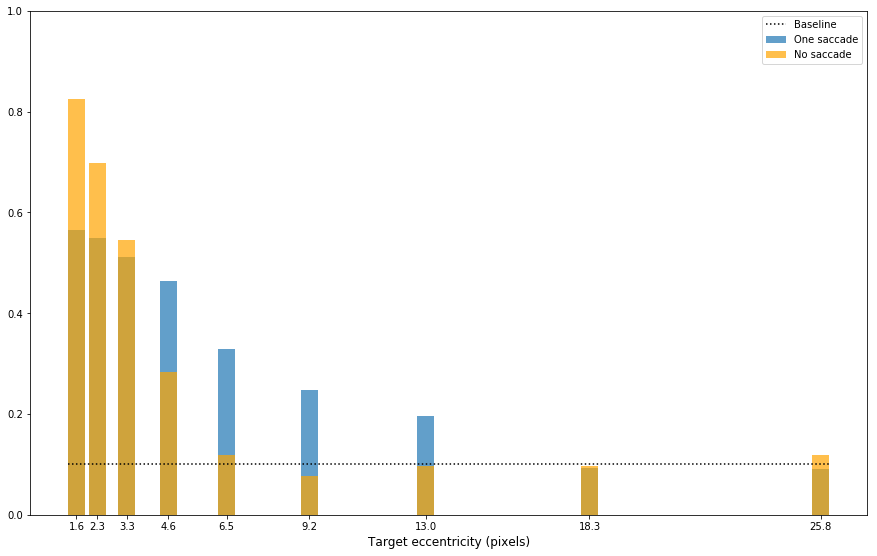

In [64]:
figwidth = 15
fig = plt.figure(figsize = (figwidth, figwidth/1.618))
ax_D = fig.add_subplot(1, 1, 1)
width = .8*np.abs(np.gradient(eccentricities)[0])
ax_D.bar(eccentricities, accuracy_mean, width=width, alpha = .7, label = 'One saccade')#yerr=accuracy_std, 
# TODO what instead? ax_D.bar(eccentricities, accuracy_data, alpha = .5, label = 'No saccade') #accuracy_map[27,27:55])
ax_D.bar(eccentricities, ctl_accuracy_mean, width=width, color='orange', alpha = .7, label = 'No saccade')
ax_D.plot([eccentricities.min()-width/2, eccentricities.max()+width/2], [0.1]*2, ':', c='k', label = 'Baseline')
plt.legend(loc='best')
#ax_D.set_title('Class accuracy', fontsize = 14)
ax_D.set_xlabel('Target eccentricity (pixels)', fontsize = 12)
ax_D.set_xticks(eccentricities)
ax_D.set_xticklabels(['%.1f' % d for  d in eccentricities])
ax_D.set_ylim([0,1]);

# summary


In [65]:
data, label = next(iter(where.display.loader_test))


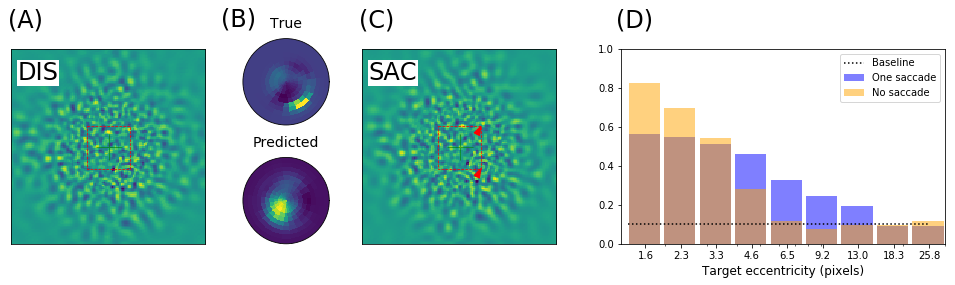

In [66]:
from where import WhereShift
idx = 0
fullfield = data_fullfield[idx, :, :]

fig = plt.figure(figsize = (figwidth, figwidth/2.5))#1.618))
ax_A = plt.subplot(1, 4, 1) 
data_retina = where.retina.retina(fullfield)
ax_A = where.retina.show(ax_A, where.retina.retina_invert(data_retina))
    
ax_B = plt.subplot(2, 4, 2, projection='polar', autoscale_on=False)
ax_B.pcolor(where.retina.theta_grid, where.retina.log_r_grid, accuracy_colliculus[idx, :].numpy().reshape((args.N_azimuth, args.N_eccentricity)))
ax_B.grid('off')
plt.title('True', fontsize = 14)
ax_B.set_yticklabels([])
ax_B.set_xticklabels([])

ax_Bb = plt.subplot(2, 4, 6, projection='polar')
ax_Bb.pcolor(where.retina.theta_grid, where.retina.log_r_grid, pred_accuracy_colliculus[idx, :].reshape((args.N_azimuth, args.N_eccentricity)))
ax_Bb.set_title('Predicted', fontsize = 14)
ax_Bb.set_yticklabels([])
ax_Bb.set_xticklabels([])

ax_C = plt.subplot(1, 4, 3)
#data_fullfield_ = where.display.place_object(data[idx, 0, :, :].numpy(), 0, 0)
i_pred, j_pred = where.index_prediction(pred_accuracy_colliculus[idx, :])
data_fullfield_ = WhereShift(args, i_offset=-i_pred, j_offset=-j_pred, baseline=0.5)((fullfield, 0)) 
input_vector  =  where.retina.retina(data_fullfield_)
ax_C = where.retina.show(ax_C, where.retina.retina_invert(input_vector))
#ax_A.arrow(64.5, 64.5, j_pred, i_pred, width=.3, color='r', head_width=4., length_includes_head=True, edgecolor='k')
ax_C.arrow(args.N_pic//2+j_pred+14, args.N_pic//2+i_pred+14, -j_pred, -i_pred, width=.3, color='r', head_width=4., length_includes_head=True, edgecolor='k')
ax_C.arrow(args.N_pic//2+j_pred+14, args.N_pic//2+i_pred-14, -j_pred, -i_pred, width=.3, color='r', head_width=4., length_includes_head=True, edgecolor='k')

ax_D = plt.subplot(1, 4, 4)
#width = .8*np.abs(np.gradient(eccentricities)[0])
width = .3*np.abs(eccentricities)
ax_D.bar(eccentricities, accuracy_mean, width=width, color='blue', alpha = .5, label = 'One saccade')
ax_D.bar(eccentricities, ctl_accuracy_mean, width=width, color='orange', alpha = .5, label = 'No saccade')
width = .5
ax_D.plot([eccentricities.min()-width/2, eccentricities.max()+width/2], [0.1]*2, ':', c='k', label = 'Baseline')
#ax_D.plot([eccentricities.min()-width/2, eccentricities.max()+width/2], [acc_max]*2, ':', c='k', label = 'Max')

plt.legend(loc='upper right')
ax_D.set_xlabel('Target eccentricity (pixels)', fontsize = 12)
ax_D.set_ylim([0,1])
ax_D.set_xscale('log')
ax_D.set_xticks(eccentricities)
ax_D.set_xticklabels(['%.1f' % d for  d in eccentricities])
ax_D.set_xlim([1.3,30])

for ax, text in [[ax_A, 'DIS'], [ax_C, 'SAC']]:
    ax.text(4, 15, text, fontsize=24,
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
          ha='left', va='center') 

offset = -.015
for ax, text, x_offset, y_offset in [[ax_A, 'A', offset, 1.15], [ax_B, 'B', -.25, 1.225], [ax_C, 'C', offset, 1.15], [ax_D, 'D', offset, 1.15]]:
    ax.text(x_offset, y_offset, '(' + text + ')', fontsize=24,
              bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
              ha='left', va='center', transform=ax.transAxes) 

# pos : [left, bottom, width, height] =    The new position of the in `.Figure` coordinates.    
plt.tight_layout()
ax_A.set_position([0.025, 0.1, .3, .45])
ax_B.set_position( [0.24, 0.375, .2, 0.2])
ax_Bb.set_position([0.24, 0.1, .2, 0.2])
ax_C.set_position([0.35, .1, .3, .45])
ax_D.set_position([0.65, .1, .3, .45])
fig.savefig(figname + '.pdf', bbox_inches='tight', pad_inches=0.1)

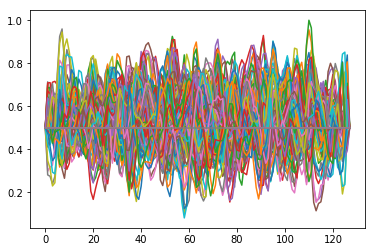

In [58]:
_ = plt.plot(fullfield.detach().numpy())

# post-processing

In [59]:
!convert  -density {dpi_export} {figname}.pdf {figname}.jpg
!convert  -density {dpi_export} {figname}.pdf {figname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff

convert-im6.q16: invalid argument for option `-density': {dpi_export} @ error/convert.c/ConvertImageCommand/1277.
convert-im6.q16: invalid argument for option `-density': {dpi_export} @ error/convert.c/ConvertImageCommand/1277.


In [60]:
from IPython.display import Image
Image('{figname}.png'.format(figname=figname))

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

In [61]:
!ls  -l {figname}*

-rw-r--r-- 1 dauce dauce 97089 juin  16 02:04 ../paper/fig_result_contrast_0.3.pdf
